In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

import psycopg2
import pandas.io.sql as sqlio
import psycopg2.extras


In [2]:
# Establish a connection to the PLUTO database
try:
    conn = psycopg2.connect("dbname='pluto' user='oliver' host='localhost' password='m'")
except:
    print("I am unable to connect to the database")

# Create a cursor object for executing queries
conn.autocommit = True
cur = conn.cursor()

In [3]:
    cov_forest = [
    'xcoord'
    ,'ycoord'
    ,'age'
    ,'build_alter_gap'
    ,'alterage'      
    ,'elevator'
    ,'commercial'
    ,'garage'
    ,'storage'
    ,'basement'
    ,'waterfront'
    ,'frontage'
    ,'block_assmeblage'
    ,'cooperative'
    ,'conv_loft_wh'
    ,'tenament'
    ,'garden'
    ,'semi_fireproof'
    ,'fireproof'
    ,'luxury'
    ,'artist_res'
    ,'units_per_building'
    ,'floors'
    ,'zip_avg_num_buildings'
    ,'pcvpu_l1'
    ,'pcvpu_l2'
    ,'pcvpu_l3'
    ,'avg_block_pcvpu_l1'
    ,'avg_block_pcvpu_l2'
    ,'avg_block_pcvpu_l3'
    ,'avg_neighbor1_pcvpu_l1'
    ,'avg_neighbor1_pcvpu_l2'
    ,'avg_neighbor1_pcvpu_l3'
    ,'avg_neighbor2_pcvpu_l1'
    ,'avg_neighbor2_pcvpu_l2'
    ,'avg_neighbor2_pcvpu_l3'
    ,'avg_neighbor3_pcvpu_l1'
    ,'avg_neighbor3_pcvpu_l2'
    ,'avg_neighbor3_pcvpu_l3'
    ,'avg_neighbor4_pcvpu_l1'
    ,'avg_neighbor4_pcvpu_l2'
    ,'avg_neighbor4_pcvpu_l3'
    ,'avg_zip_pcvpu_l1'
    ,'avg_zip_pcvpu_l2'
    ,'avg_zip_pcvpu_l3'
    ]

In [4]:
# Commands to select data from each year
sql_2008 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2008
         """
sql_2009 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2009
         """
sql_2010 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2010
         """
sql_2010 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2010
         """
sql_2011 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2011
         """
sql_2012 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2012
         """
sql_2013 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2013
         """
sql_2014 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2014
         """
sql_2015 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2015
         """
sql_2016 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2016
         """
sql_2017 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2017
         """
sql_2018 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2018
         """
sql_2019 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2019
         """
sql_2020 = """SELECT * 
         FROM pluto_sym
         WHERE year = 2020
         """

In [5]:
# Function for creating dataframes from a SQL query
def get_data(sql_train, sql_test, cov_forest):
    """
    Function to return data from a train and test SQL query
    """
    global df_train, df_test, X_train, X_test, y_train, y_test, covariates

    # List of columns to be used as covariates in the model

    df_train = sqlio.read_sql_query(sql_train, conn).dropna()
    df_test = sqlio.read_sql_query(sql_test, conn).dropna()

    covariates = df_train.columns.intersection(cov_forest)

    X_train = df_train[covariates]
    y_train = df_train['pcvpu_target']

    X_test = df_test[covariates]
    y_test = df_test['pcvpu_target']
    return df_train, df_test, X_train, X_test, y_train, y_test

In [6]:
# Create a random forest classifier object
# warm_start = True allows the model to be trained on new data without having to retrain the entire model
rf = RandomForestRegressor(warm_start=True, n_estimators=100, max_depth=100, random_state=0)

In [7]:
# Set up empty lists to store the results of the model for each year

MAEs = [] ## Mean Absolute Error, list of numbers (out of sample)
MSEs = [] ## Mean Squared Error, list of numbers (out of sample)
R2s = []  ## R2 score, list of numbers (out of sample)

feature_importances = [] ## Feature importances, list of lists

MAEs_in_sample = [] ## Mean Absolute Error, list of numbers (in sample)
MSEs_in_sample = [] ## Mean Squared Error, list of numbers (in sample)
R2s_in_sample = []  ## R2 score, list of numbers (in sample)


def update_reports():
    """
    Function to update the reports for each year
    """
    print('Updating Out of Sample Reports')

    MSEs.append(mean_squared_error(y_test, y_pred))
    MAEs.append(mean_absolute_error(y_test, y_pred))
    R2s.append(r2_score(y_test, y_pred))
    print('MSE: {}'.format(MSEs[-1]))
    print('MAE: {}'.format(MAEs[-1]))
    print('R2: {}'.format(R2s[-1]))

    print('Updating In Sample Reports')

    MSEs_in_sample.append(mean_squared_error(y_train, y_pred_in_sample))
    MAEs_in_sample.append(mean_absolute_error(y_train, y_pred_in_sample))
    R2s_in_sample.append(r2_score(y_train, y_pred_in_sample))
    print('MSE: {}'.format(MSEs_in_sample[-1]))
    print('MAE: {}'.format(MAEs_in_sample[-1]))
    print('R2: {}'.format(R2s_in_sample[-1]))

    print('Updating Feature Importances')
    feature_importances.append(pd.Series(rf.feature_importances_, index=cov_forest))


In [8]:
# get data from 2008 and 2009
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2008, sql_2009, cov_forest)


In [9]:
# fit the model for 2008 and 2009
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, random_state=0, warm_start=True)

In [10]:
# Make in and out of sample predictions
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)

In [11]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 338.2585894717582
MAE: 6.626045008269003
R2: -0.05254510785117805
Updating In Sample Reports
MSE: 47.763215424409594
MAE: 2.0613055809622858
R2: 0.900547625414621
Updating Feature Importances


In [12]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2009, sql_2010, cov_forest)

In [13]:
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=200, random_state=0,
                      warm_start=True)

In [14]:
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)

In [15]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 227.94854607227506
MAE: 6.627637998462037
R2: -0.13449031553570756
Updating In Sample Reports
MSE: 140.32355646568644
MAE: 4.023822797706064
R2: 0.5633610572760688
Updating Feature Importances


In [16]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2010, sql_2011, cov_forest)

In [17]:
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=300, random_state=0,
                      warm_start=True)

In [18]:
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)

In [19]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 57.15782294891655
MAE: 4.710376288622071
R2: -0.9711342093832505
Updating In Sample Reports
MSE: 129.82635540951637
MAE: 4.799247327688156
R2: 0.3538596957460157
Updating Feature Importances


In [20]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2011, sql_2012, cov_forest)

In [21]:
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=400, random_state=0,
                      warm_start=True)

In [22]:
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)

In [23]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 144.50272049291087
MAE: 5.321653962134353
R2: -0.07079564594907684
Updating In Sample Reports
MSE: 35.70619935448511
MAE: 3.6166542915431137
R2: -0.23135744861356478
Updating Feature Importances


In [24]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2012, sql_2013, cov_forest)

In [25]:
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=500, random_state=0,
                      warm_start=True)

In [26]:
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)

In [27]:
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 141.1492528515583
MAE: 5.089701917395531
R2: -0.0442898454244256
Updating In Sample Reports
MSE: 103.75629326143012
MAE: 4.402791371000811
R2: 0.23114397649277874
Updating Feature Importances


In [28]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2013, sql_2014, cov_forest)
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)
# make predictions for the next year
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 113.2031763676705
MAE: 4.702752168087691
R2: -0.10166294678356014
Updating In Sample Reports
MSE: 109.18992793831785
MAE: 4.39862473600975
R2: 0.19216056291472405
Updating Feature Importances


In [29]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2014, sql_2015, cov_forest)
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)
# make predictions for the next year
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)
# update all the report series
update_reports()

In [ ]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2015, sql_2016, cov_forest)
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)
# make predictions for the next year
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)
# update all the report series
update_reports()

Error: Session cannot generate requests

In [ ]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2016, sql_2017, cov_forest)
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)
# make predictions for the next year
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 0.35069862511606836
MAE: 0.43262060409785486
R2: 0.1921155824097971
Updating In Sample Reports
MSE: 0.31845209917653783
MAE: 0.4118353765524916
R2: 0.28225511615771604
Updating Feature Importances


In [ ]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2017, sql_2018, cov_forest)
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)
# make predictions for the next year
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 2.09590359935891
MAE: 1.4111458512431942
R2: -0.024848896737135417
Updating In Sample Reports
MSE: 0.3014970174919788
MAE: 0.3990816872189365
R2: 0.30545851925973133
Updating Feature Importances


In [ ]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2018, sql_2019, cov_forest)
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)
# make predictions for the next year
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 1.5240101199303315
MAE: 1.1121391383908417
R2: -0.07030326846332091
Updating In Sample Reports
MSE: 1.7567258417393676
MAE: 1.2920483852499685
R2: 0.14100126488312625
Updating Feature Importances


In [ ]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(sql_2019, sql_2020, cov_forest)
# expand the number of trees and then fit to the next year
rf.n_estimators += 100
rf.fit(X_train,y_train)
# make predictions for the next year
y_pred = rf.predict(X_test)
y_pred_in_sample = rf.predict(X_train)
# update all the report series
update_reports()

Updating Out of Sample Reports
MSE: 1.6755823163383237
MAE: 1.2186893934382852
R2: -0.8680514027031416
Updating In Sample Reports
MSE: 1.3226598285648128
MAE: 1.0369251794288854
R2: 0.07110384697263716
Updating Feature Importances


Text(0.5, 1.0, 'R2 Scores by Year')

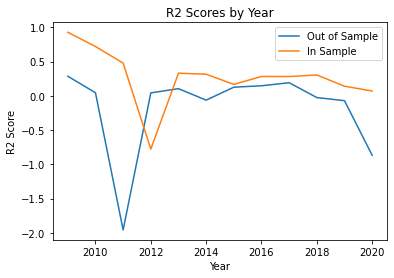

In [ ]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
years_in_sample = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.plot(years, R2s, label='Out of Sample')
plt.plot(years_in_sample, R2s_in_sample, label='In Sample')
plt.legend()
plt.xlabel('Year')
plt.ylabel('R2 Score')
plt.title('R2 Scores by Year')



Text(0.5, 1.0, 'Mean Squared Error by Year')

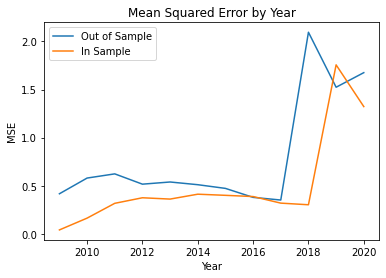

In [ ]:
plt.plot(years, MSEs, label='Out of Sample')
plt.plot(years_in_sample, MSEs_in_sample, label='In Sample')
plt.legend()
plt.xlabel('Year')
plt.ylabel('MSE')
plt.title('Mean Squared Error by Year')

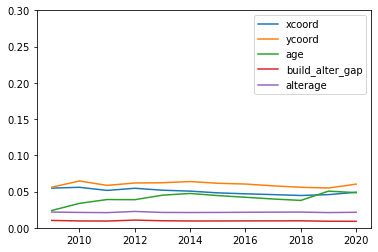

In [ ]:
plt.axis([None, None, 0, 0.3])
plt.plot(years, [feature_importances[i][:5] for i in range(len(feature_importances))])
plt.legend(cov_forest[:5])

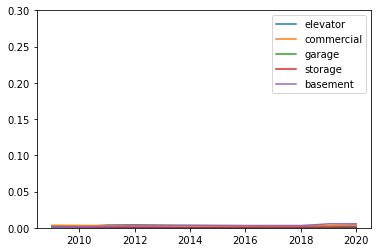

In [ ]:
plt.axis([None, None, 0, 0.3])
plt.plot(years, [feature_importances[i][5:10] for i in range(len(feature_importances))])
plt.legend(cov_forest[5:10])

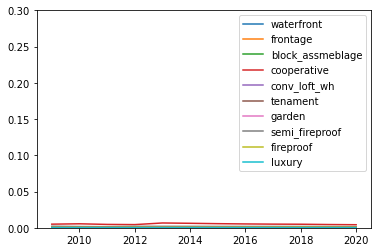

In [ ]:
plt.axis([None, None, 0, 0.3])
plt.plot(years, [feature_importances[i][10:20] for i in range(len(feature_importances))])
plt.legend(cov_forest[10:20])

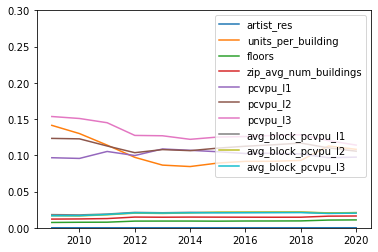

In [ ]:
plt.axis([None, None, 0, 0.3])

plt.plot(years, [feature_importances[i][20:30] for i in range(len(feature_importances))])
plt.legend(cov_forest[20:30])

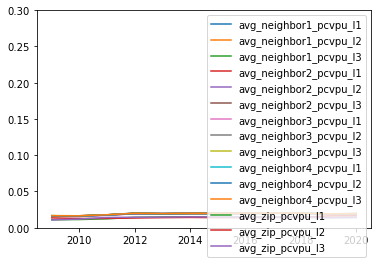

In [ ]:
plt.axis([None, None, 0, 0.3])
plt.plot(years, [feature_importances[i][30:] for i in range(len(feature_importances))])
plt.legend(cov_forest[30:])